In [6]:
import cnnfeat
from cnnfeat import cnn_model, get_feats, cnn_encoder, cnn_decoder
from keras.models import Model
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from position import Position
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_multi(im, dim=(4,4), figsize=(6,6), **kwargs ):
    plt.figure(figsize=figsize)
    for i,img in enumerate(im):
        plt.subplot(*((dim)+(i+1,)))
        plt.imshow(img, **kwargs)
        plt.axis('off')
    plt.tight_layout()

In [9]:
net_input, net_output = cnn_model()
model = Model(net_input, net_output)
# model.summary()
model.compile(optimizer=Adam(1e-3), loss='mse')
model.load_weights('../slonik_data/cnn_weights_epoch3.h5')

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 8, 8, 14)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 192)         24384     
_________________________________________________________________
batch_normalization_39 (Batc (None, 8, 8, 192)         768       
_________________________________________________________________
activation_43 (Activation)   (None, 8, 8, 192)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 192)         331968    
_________________________________________________________________
batch_normalization_40 (Batc (None, 8, 8, 192)         768       
_________________________________________________________________
activation_44 (Activation)   (None, 8, 8, 192)         0         
__________

In [70]:
emb_layer = model.get_layer('activation_61')
encoder = Model(net_input, emb_layer.get_output_at(0))

In [60]:
file_name = '../slonik_data/sf_scores.pkl'
sf_scores = pd.read_pickle(file_name)

In [61]:
fens = sf_scores.fen.iloc[8:16]

In [62]:
ps = [Position.from_fen(fen) for fen in fens]

In [63]:
[print(p) for p in ps]

B to move
 ·  ·  ·  ·  ·  ♗  ♜  ♚ 
 ·  ·  ·  ♛  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ♟  ·  · 
 ♟  ·  ·  ·  ♟  ♖  ·  · 
 ·  ·  ·  ♝  ♕  ·  ♙  · 
 ·  ♙  ·  ·  ·  ·  ·  ♙ 
 ♙  ·  ·  ·  ·  ·  ♔  · 
 ·  ·  ♖  ·  ·  ·  ·  · 

B to move
 ·  ·  ·  ♜  ·  ·  ·  ♜ 
 ♟  ·  ·  ·  ·  ♚  ♟  · 
 ♝  ·  ♟  ·  ♟  ·  ·  ♟ 
 ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ♙  ·  ·  ·  · 
 ·  ·  ♙  ·  ♕  ·  ·  · 
 ♙  ·  ·  ·  ·  ♙  ♙  ♙ 
 ♖  ·  ·  ·  ·  ·  ♔  · 

B to move
 ·  ·  ·  ♛  ♜  ·  ♚  · 
 ·  ♟  ·  ·  ♝  ♟  ♟  · 
 ·  ·  ♟  ·  ♝  ♞  ·  ♟ 
 ♜  ·  ·  ♞  ♘  ·  ·  · 
 ♘  ·  ·  ♙  ·  ♙  ·  · 
 ·  ♙  ·  ♕  ·  ·  ♙  · 
 ♙  ♗  ·  ·  ·  ·  ♗  ♙ 
 ·  ·  ♖  ·  ♖  ·  ♔  · 

B to move
 ♗  ·  ·  ♛  ♚  ·  ·  ♜ 
 ♟  ·  ♟  ·  ♝  ♟  ·  · 
 ·  ·  ·  ♟  ·  ♞  ·  ♟ 
 ·  ♟  ·  ·  ♞  ♝  ·  · 
 ·  ·  ·  ·  ♙  ·  ♟  · 
 ·  ·  ♘  ·  ♗  ·  ·  · 
 ♙  ♙  ♙  ·  ·  ♙  ♙  ♙ 
 ♖  ·  ·  ♕  ♖  ·  ♔  · 

B to move
 ♜  ♞  ♝  ·  ·  ·  ·  ♜ 
 ·  ·  ♚  ·  ·  ·  ·  ♟ 
 ·  ♞  ♟  ·  ·  ♟  ♟  · 
 ♟  ♟  ·  ·  ♟  ·  ·  · 
 ·  ·  ·  ·  ♙  ·  ·  ♘ 
 ♙  ·  ♘  ♖  ·  ♙  ♙ 

[None, None, None, None, None, None, None, None]

In [112]:
encodings = encoder.predict(np.stack([get_feats(p) for p in ps]))

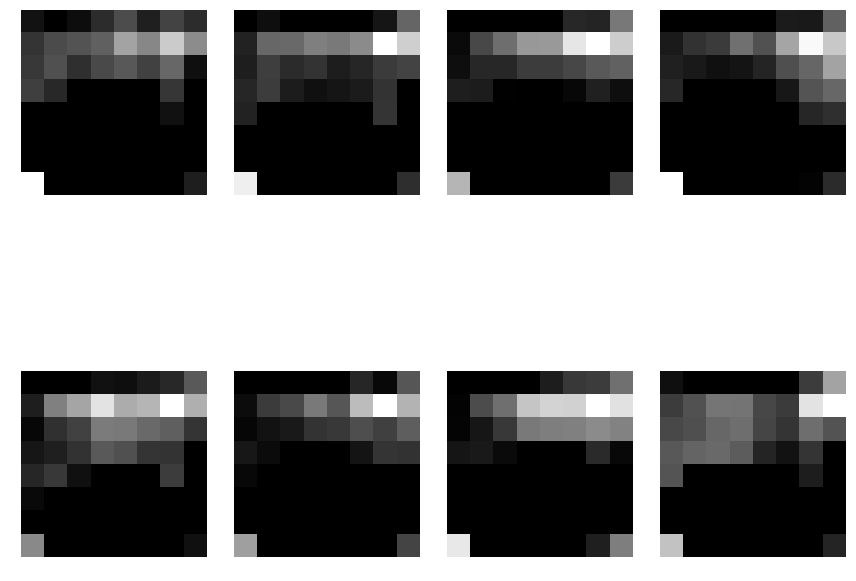

In [113]:
plot_multi(encodings.squeeze(), dim=(2,4), figsize=(12,12))

## printing predictions

In [158]:
from piece_type import PieceType as Pt
from bb import PICTURE_PIECES
def print_feats(feats):
    planes_flat = np.transpose(feats, (2,0,1)).reshape(14,-1).tolist()
    krights_plane, stm_plane, wp_plane, bp_plane, wn_plane, bn_plane, wb_plane, bb_plane, \
        wr_plane, br_plane, wq_plane, bq_plane, wk_plane, bk_plane = planes_flat
        
    ptmap = [-1, -1, Pt.P, Pt.BP, Pt.N, Pt.BN, Pt.B, Pt.BB, Pt.R, Pt.BR, Pt.Q, Pt.BQ, Pt.K, Pt.BK]
    res = ''
    for i in range(8):
        res += '·' * 8 
    res = list(res)
    for i in range(14):
        if i >= 2:
            pt = ptmap[i]
            for j in range(64):
                if planes_flat[i][j] == 1:
                    res[j] = PICTURE_PIECES[pt]
    for i in range(1,8):
        res[i*8-1] += '\n' 
    print('  '+'  '.join(res))
    print('{} to move'.format('W' if stm_plane[0] == 0 else 'B'))

## autoencoder

In [39]:
import imp
imp.reload(cnnfeat)
from cnnfeat import cnn_decoder, cnn_encoder
import keras

In [40]:
enc_input, enc_output = cnn_encoder()
encoder = Model(enc_input, enc_output)

In [41]:
dec_input, dec_output = cnn_decoder()
decoder = Model(dec_input, dec_output)

In [42]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 8, 8, 14)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 64)          8128      
_________________________________________________________________
batch_normalization_43 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
activation_43 (Activation)   (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
batch_normalization_44 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
activation_44 (Activation)   (None, 8, 8, 64)          0         
__________

In [43]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 4, 4, 2)           0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 4, 4, 14)          266       
_________________________________________________________________
batch_normalization_47 (Batc (None, 4, 4, 14)          56        
_________________________________________________________________
activation_47 (Activation)   (None, 4, 4, 14)          0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 8, 8, 14)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 14)          1778      
_________________________________________________________________
batch_normalization_48 (Batc (None, 8, 8, 14)          56        
__________

In [44]:
autoencoder = keras.models.Sequential([encoder, decoder])

In [45]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_8 (Model)              (None, 4, 4, 2)           83914     
_________________________________________________________________
model_9 (Model)              (None, 8, 8, 14)          7658      
Total params: 91,572.0
Trainable params: 91,044.0
Non-trainable params: 528.0
_________________________________________________________________


In [48]:
def train_data_supervised():
    file_name = '../slonik_data/sf_scores.pkl'
    sf_scores = pd.read_pickle(file_name)
    valid_n = 6e4
    train_n = int(len(sf_scores) - valid_n)
    train_data = sf_scores[:train_n]
    valid_data = sf_scores[train_n:]
    return train_data, valid_data

In [46]:
def batch_generator(data, batch_size, shuffle=True):
    while True:
        data_ = data.sample(frac=1) if shuffle else data
        for iteration, batch in data_.groupby(np.arange(len(data)) // batch_size):
            fens = [f.strip() for f in batch.fen.tolist()]
            feats = np.stack([get_feats(Position.from_fen(fen)) for fen in fens])
            yield feats, feats

In [54]:
from math import ceil
train_data, valid_data = train_data_supervised()
batch_size = 32

train_gen = batch_generator(train_data, batch_size)
valid_gen = batch_generator(valid_data, batch_size, shuffle=False)

train_steps = ceil(len(train_data) / batch_size)
valid_steps = ceil(len(valid_data) / batch_size)

autoencoder.compile(optimizer=Adam(1e-3), loss='mse')
autoencoder.fit_generator(train_gen, train_steps, epochs=1, 
                          validation_data=valid_gen, validation_steps=valid_steps)

Epoch 1/1
7366/7366 [==============================] - 656s - loss: 0.0206 - val_loss: 0.0099


In [55]:
autoencoder.save_weights('../slonik_data/autoencoder_v1.h5')

In [ ]:
autoencoder.load_weights('../slonik_data/autoencoder_v1.h5')

In [173]:
preds = autoencoder.predict(np.stack([get_feats(p) for p in ps[0:3]]))
[print_feats(p) for p in np.round(preds)]
print('\n')
for p in ps[0:3]:
    print(p)

  ·  ·  ·  ·  ·  ·  ·  ·
  ·  ·  ·  ·  ·  ·  ·  ·
  ·  ·  ·  ·  ·  ·  ·  ·
  ·  ·  ·  ·  ·  ·  ·  ·
  ·  ·  ·  ·  ·  ·  ·  ·
  ·  ♙  ·  ·  ·  ·  ·  ♙
  ♙  ·  ·  ·  ·  ·  ·  ·
  ·  ·  ·  ·  ·  ·  ·  ·
B to move
  ·  ·  ·  ·  ·  ·  ·  ·
  ♟  ·  ·  ·  ·  ·  ♟  ·
  ·  ·  ·  ·  ·  ·  ·  ♟
  ·  ·  ·  ♟  ·  ·  ·  ·
  ·  ·  ·  ·  ·  ·  ·  ·
  ·  ·  ♙  ·  ·  ·  ·  ·
  ♙  ·  ·  ·  ·  ♙  ♙  ♙
  ♖  ·  ·  ·  ·  ·  ♔  ·
B to move
  ·  ·  ·  ·  ·  ·  ♚  ·
  ·  ♟  ·  ·  ·  ♟  ♟  ·
  ·  ·  ·  ·  ·  ·  ·  ♟
  ·  ·  ·  ♟  ·  ·  ·  ·
  ·  ·  ·  ·  ·  ·  ·  ·
  ·  ♙  ·  ·  ·  ·  ♙  ·
  ♙  ·  ·  ·  ·  ·  ·  ♙
  ·  ·  ·  ·  ·  ·  ♔  ·
B to move


B to move
 ·  ·  ·  ·  ·  ♗  ♜  ♚ 
 ·  ·  ·  ♛  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ♟  ·  · 
 ♟  ·  ·  ·  ♟  ♖  ·  · 
 ·  ·  ·  ♝  ♕  ·  ♙  · 
 ·  ♙  ·  ·  ·  ·  ·  ♙ 
 ♙  ·  ·  ·  ·  ·  ♔  · 
 ·  ·  ♖  ·  ·  ·  ·  · 

B to move
 ·  ·  ·  ♜  ·  ·  ·  ♜ 
 ♟  ·  ·  ·  ·  ♚  ♟  · 
 ♝  ·  ♟  ·  ♟  ·  ·  ♟ 
 ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ♙  ·  ·  ·  · 
 ·  ·  ♙  ·  ♕  ·  ·  

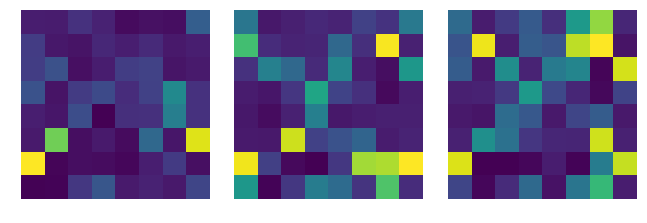

In [174]:
plot_multi(preds.mean(-1), dim=(4,4), figsize=(12,12))

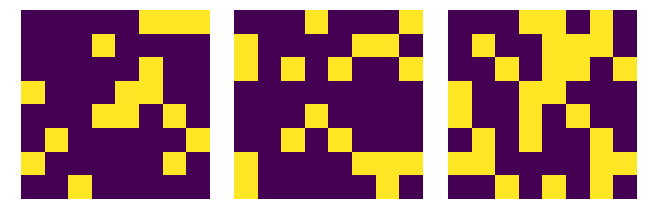

In [178]:
plot_multi([get_feats(p).mean(-1) for p in ps[0:3]], dim=(4,4), figsize=(12,12))